<a href="https://colab.research.google.com/github/LuisEduardoF/RedesNeurais_202501/blob/main/T2_Redes_Neurais_CNN_LUIS_CAMARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠🤖 Treinamento de Redes Convolucionais

- **Deadline**: 27/07/2025
- **Entrega**: O trabalho deve ser entregue via sistema Testr.
- **Pontuação**: 5 pontos (+1 ponto extra).
- O trabalho deve ser realizado individualmente.



## Especificação


### Contexto

O trabalho consiste em realizar o treinamento de redes neurais convolucionais na base de dados [Chest X-ray Image (COVID19, PNEUMONIA, and NORMAL) disponível no kaggle](https://www.kaggle.com/datasets/alsaniipe/chest-x-ray-image). Esta base de dados contém exames de raio-x de pacientes saudáveis, com pneumonia e com covid19. O objetivo do trabalho é treinar uma rede neural capaz de identificar se o raio-x pertence a uma pessoa saudável ou com uma das duas doenças.




### Regras

- Devem ser treinadas 3 redes neurais, uma customizada (desenvolvida pelo aluno), uma pré-treinada com parte convolucional congelada e uma pré-treinada  treinada totalmente (*fine-tuning*).
- O dataset provê conjuntos de treino e teste. O conjunto de treino deve ser dividido em
- O código deve ser preparado para utilizar GPUs (no colab ou localmente).
- Não devem ser utilizados frameworks de alto nível como keras ou lightning. O código deve utilizar apenas pytorch.
- Deve ser utilizado data augmentation (o aluno tem liberdade para escolher os métodos que fizerem sentido para a tarefa).
- Ao final, deve ser apresentados gráficos comparando as acurácias de treino e validação ao longo das épocas e uma tabela apresentando as métricas de performance revocação, f1-score e acurácia para o conjunto de teste em cada configuração de rede neural. Além disso, deve ser uma análise qualitativa dos casos de falha.
- Por fim, deve ser escrito um texto curto descrevendo e discutindo os resultados. Deve ser explicado com as suas palavras o que as métricas indicam (e.g., o que quer dizer um recall alto para pneumonia, se isto acontecer), se aconteceu overfitting ou se o modelo alcançou uma boa generalização, se os valores das métricas foram satisfatórios, prováveis causas para as falhas e sugestões de como melhorar a performance.



### Pontos Extras

- Receberá um ponto extra, o aluno que utilizar um método explainability (e.g., [gradcam++](https://github.com/jacobgil/pytorch-grad-cam)) para mostrar as regiões que mais influenciaram a decisão da rede neural.


### Dicas de Implementação

- **Download dos dados**: use a biblioteca `kagglehub` para fazer o download do dataset no colab.

- **Criação do dataset**: o pytorch possui a função [ImageFolder](https://debuggercafe.com/pytorch-imagefolder-for-training-cnn-models/) que torna mais simples a criação de datasets organizados no formato do dataset utilizado no trabalho.

- **Leitura e preprocessamento das Imagens**: As imagens do dataset possuem características bastante diversas, com algumas delas sendo armazenadas em tons de cinza e outras em RGB, algumas são arquivos BITMAP armazenados em formato jpg, algumas usam 8 bits e outras 16 bits para representar pixels e as resoluções das imagens são altamente diferentes. Use a função abaixo para ler as imagens e lembre-se de realizar *resize* para o tamanho esperado pela rede neural.

```python
from PIL import Image

def load_img(path):
  # Le a imagem em diversos formatos e garante que a imagem tenha 3 canais
  img = Image.open(path).convert('RGB')
  # converte para um tensor do pytorch
  img = v2.functional.to_image(img)
  # garante que seja uma imagem de 8 bits reescalando os valores adequadamente
  img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
  return img
```

- **Aumento de Dados**: Para visualizar a maioria das transformações disponíveis, veja [este site](https://docs.pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html). Use a versão `v2` do pacote `pytorch.transforms`. Veja [este link](https://docs.pytorch.org/vision/main/transforms.html#v2-api-reference-recommended) para uma explicação do porquê e instruções de uso.
  - ⚠️**IMPORTANTE**⚠️: o aumento de dados deve ser aplicado apenas no conjunto de treinamento para aumentar a diversidade dos dados. Os dados de validação e teste devem ser **puros e não modificados**, exceto por operações como resize ou normalização.


- **Seleção de um modelo pré-treinado**: É uma boa idéia experimentar com diferentes modelos pré-treinados para avaliar qual vai levar a predições mais corretas e avaliar outros critérios, por exemplo, tempo de forward por imagem. Uma heurística para escolher modelos é buscar aqueles que possuem [melhor performance na base de dados ImageNet](https://docs.pytorch.org/vision/0.21/models.html#table-of-all-available-classification-weights:~:text=Table%20of%20all%20available%20classification%20weights).
  - As redes mobilenet-v2 e -v3 são desenhadas para serem rápidas e rodarem em dispositivos de baixo poder computacional.
  - A rede densenet em geral entrega boa performance.
  - As Efficientnet-b5+ não rodam no colab (até a última vez que testei) por falta de memória.
  - As redes ViT usam a arquitetura transformers e não são convolucionais. **Elas podem ser utilizadas para comparação, mas pelo menos uma outra rede neural totalmente convolucional deve ser utilizada**.

- **Visualize sempre que possível**: Não deixe de visualizar pelo menos uma vez os batches que estão sendo usados para treinar a rede. Alguma operação pode estar transformando as imagens de forma que a impedir que a rede neural seja capaz de aprender os padrões que ela deveria aprender.

- **Brinque com Hiperparâmetros**: Ajuste os hiperparâmetros para tentar chegar em modelos com o máximo de performance de validação. Não é obrigatório, mas é legal brincar também com técnicas de regularização, caso a rede esteja sofrendo de overfitting.

- **Desbalanceamento do Dataset**: O dataset possui algum nível de desbalanceamento, com mais imagens normais do que com covid ou pneumonia. Não é obrigatório, mas quem quiser pode realizar superamostragem dos dados com covid ou pneumonia para mitigar o desbalanceamento. As operações de data augmentation vão garantir que os dados tenham diversidade.


- **Escrita de tabelas**: Tabelas podem ser escritas em notebooks usando latex, como indicado abaixo.

```latex
\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}
```

O resultado seria:

\begin{array}{ccc}
\hline
modelo & métrica1 & métrica2 \\ \hline
custom & 0.85 & 0.83 \\ \hline
frozen-conv & 0.91 & 0.92 \\ \hline
fine-tuning & 0.93 & 0.90 \\ \hline
\end{array}

Elas também pode ser escritas em markdown como indicado abaixo:

```markdown
| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |
```

O resultado seria:

| modelo | métrica1 | métrica2 |
|---|---|---|
| custom | 0.85 | 0.83 |
| frozen-conv | 0.91 | 0.92 |
| fine-tuning | 0.93 | 0.90 |


### Roteiro de Implementação

Para realizar o trabalho, siga os seguintes passos:

1. Faça o download automático do dataset.
1. Compreenda a organização do dataset e visualize alguns dados.
1. Crie os dataset de treino, validação e teste do pytorch. Visualize se os dados continuam com a mesma cara.
1. Crie as transformações de data augmentation e adicione ao dataset de treino.
1. Crie transformações para os datasets de validação e teste que coloquem os dados no mesmo formato usado no treino, por exemplo, resize e normalização. Lembre-se de **NÃO** aplicar data augmentation nos conjuntos de validação e teste!
1. Crie dataloaders.
1. Construa uma CNN.
1. Escreva funções para treinamento e avaliação. Retorne o valor da acurácia para os conjuntos de treino e validação nas épocas de treinamento.
1. Crie uma loss function e um otimizador.
1. Execute o treinamento e verifique se a curva de treinamento está se comportando como esperado.
  - A acurácia de treinamento está aumentando? Se não, verifique se o dataset está certo e aumente a capacidade da rede.
  - A acurácia de treinamento se aproximando de 100%? Se não, aumente a capacidade da rede e tente ajustar a learning rate.
  - A acurácia de validação está aumentando no início do treinamento? Se não, verifique se os dados de validação estão no mesmo formato dos dados de treinamento.
  - A acurácia de validação está diminuindo depois de um número de épocas? Parece que está acontecendo overfitting. Tente usar algum método de regularização.  
1. Brinque com os hiperparâmetros para tentar fazer a rede aprender mais rápido e com maior performance de validação.
1. Crie uma função para calcular métricas de avaliação e visualize as métricas para os conjuntos de treinamento e teste. Compare os dois e veja se aconteceu overiffitting.

Repita o processo usando as redes pré-treinadas.



# Packages Installing

In [ ]:
!pip install kagglehub torch torchvision pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

## 1. Download the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alsaniipe/chest-x-ray-image") + '/Data'
path

'/kaggle/input/chest-x-ray-image/Data'

In [ ]:
from PIL import Image
import torchvision.transforms.functional as F

def load_img(path):
  # Le a imagem em diversos formatos e garante que a imagem tenha 3 canais
  img = Image.open(path).convert('RGB')
  # converte para um tensor do pytorch
  img = v2.functional.to_image(img)
  # garante que seja uma imagem de 8 bits reescalando os valores adequadamente
  img = v2.functional.to_dtype(img, dtype=torch.uint8, scale=True)
  return img

In [ ]:
from torchvision.datasets import ImageFolder
import torchvision.transforms.v2 as v2
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader, random_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import os
import random
import pandas as pd
import numpy as np
import cv2

In [ ]:
# Full dataset
full_dataset = ImageFolder(root=f"{path}/train", transform=None)

## 2. Explore the dataset

In [ ]:
class_names = os.listdir(path + "/train")
print(f"Classes: {class_names}")

Classes: ['PNEUMONIA', 'NORMAL', 'COVID19']


In [ ]:
# Classes Distribution
class_counts = {}
for cls in class_names:
    train_count = len(os.listdir(os.path.join(path + "/train", cls)))
    test_count = len(os.listdir(os.path.join(path + "/test", cls)))
    class_counts[cls] = {'train': train_count, 'test': test_count, 'total': train_count + test_count}

# Convert to DataFrame for easier analysis
counts_df = pd.DataFrame(class_counts).T
print("\nClass distribution:")
print(counts_df)


Class distribution:
           train  test  total
PNEUMONIA   3418   855   4273
NORMAL      1266   317   1583
COVID19      460   116    576


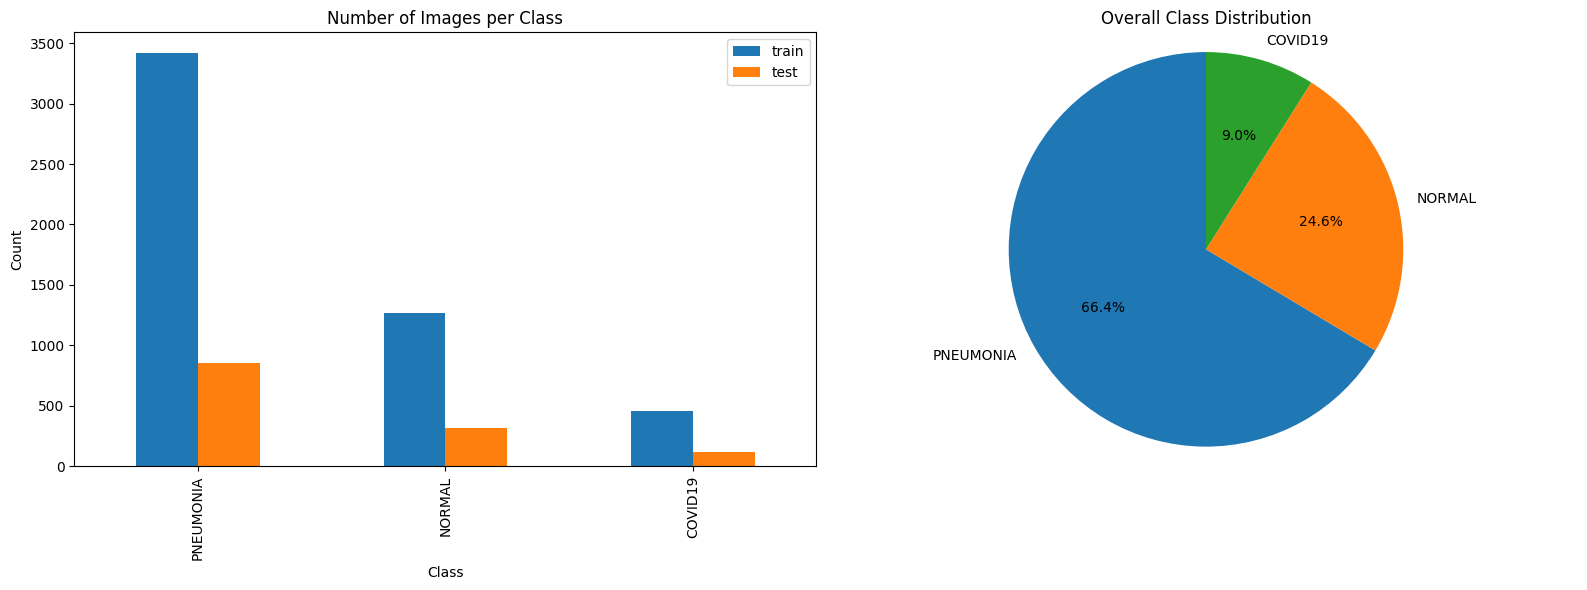

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
counts_df[['train', 'test']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Number of Images per Class')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Class')

# Pie chart for overall class distribution
axes[1].pie(counts_df['total'], labels=counts_df.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Overall Class Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

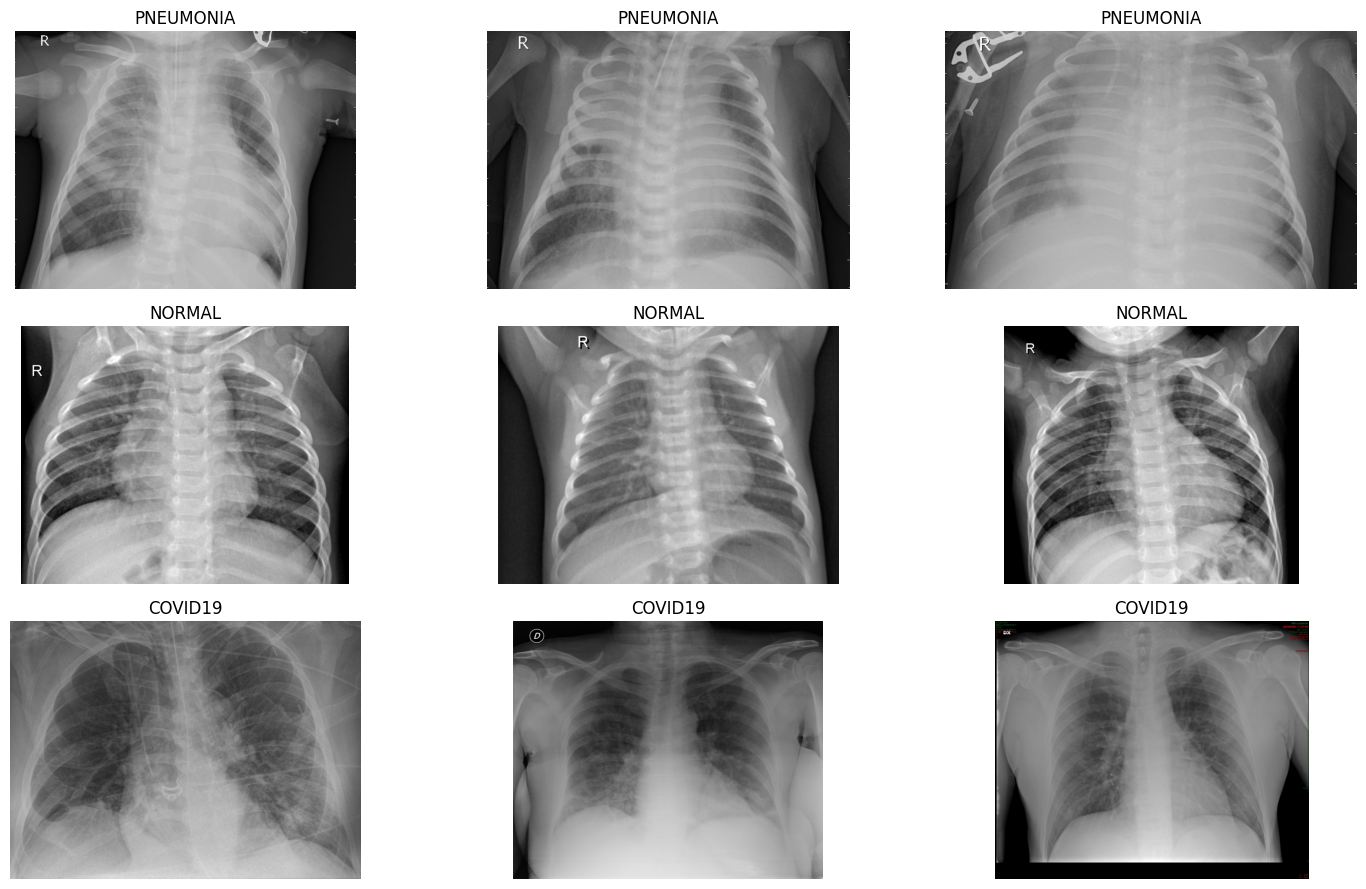

In [ ]:
# Display sample images from each class
plt.figure(figsize=(15, 3*len(class_names)))

for i, cls in enumerate(class_names):
    class_path = os.path.join(path + "/train", cls)
    image_files = os.listdir(class_path)
    sample_files = random.sample(image_files, min(3, len(image_files)))

    for j, img_file in enumerate(sample_files):
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path)

        plt.subplot(len(class_names), 3, i*3 + j + 1)
        plt.imshow(img.permute(1, 2, 0))
        plt.title(f"{cls}")
        plt.axis('off')

plt.tight_layout()
plt.show()

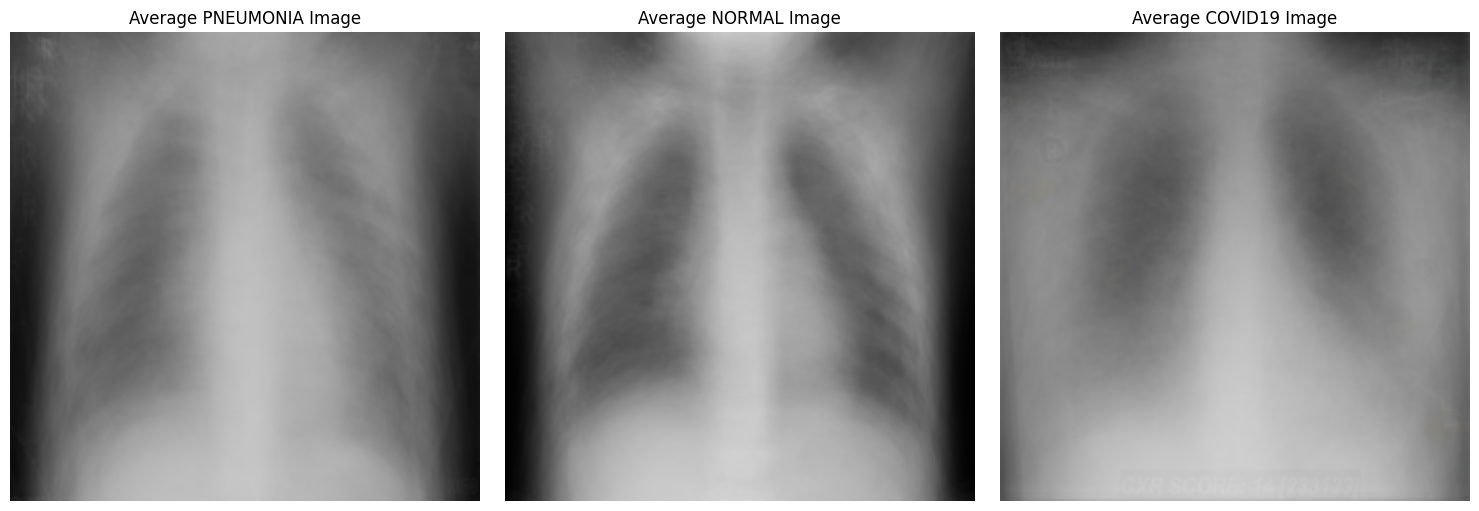

In [ ]:
# Create a function to compute and display average images
def compute_average_image(class_name, sample_size=50):
    class_path = os.path.join(path + "/train", class_name)
    image_files = os.listdir(class_path)
    sample_files = random.sample(image_files, min(sample_size, len(image_files)))

    # Use a fixed size for averaging
    target_size = (224, 224)
    avg_img = np.zeros(target_size + (3,), dtype=np.float32)

    for img_file in sample_files:
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path).convert('RGB').resize(target_size)
        avg_img += np.array(img, dtype=np.float32)

    avg_img /= len(sample_files)
    return avg_img.astype(np.uint8)

# Display average images for each class
plt.figure(figsize=(15, 5))
for i, cls in enumerate(class_names):
    avg_img = compute_average_image(cls)
    plt.subplot(1, 3, i+1)
    plt.imshow(avg_img)
    plt.title(f'Average {cls} Image')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Create Datasets

In [ ]:
train_dataset_full = ImageFolder(root=path + "/train/", transform=None)

train_size = int(0.8 * len(train_dataset_full))
val_size = len(train_dataset_full) - train_size
train_dataset, val_dataset = random_split(
    train_dataset_full,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

test_dataset = ImageFolder(root=path + "/test/", transform=None)

## 4. Define Data Augmentation

In [ ]:
img_size = (224, 224)
train_transform = transforms.Compose([
    torchvision.transforms.Resize(img_size), # Manter todas mesmo tamanho
    torchvision.transforms.RandomRotation(5), # Rotacionar um pouco as imagens (5 graus)
    torchvision.transforms.ToTensor(), # Apply ToTensor after Resize and Rotation
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## 5. Define Validation and Test Transformations

In [ ]:
val_test_transform = transforms.Compose([
    torchvision.transforms.Resize(img_size), # Manter todas mesmo tamanho
    torchvision.transforms.ToTensor(), # Apply ToTensor after Resize
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## 6. Create DataLoaders

In [ ]:
# Dataset
class XrayData(torch.utils.data.Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, idx):
        img, label = self.subset[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

    def __len__(self):
        return len(self.subset)

# Apply transformations
train_dataset_transformed = XrayData(train_dataset, train_transform)
val_dataset_transformed = XrayData(val_dataset, val_test_transform)
test_dataset_transformed = XrayData(test_dataset, val_test_transform)

In [ ]:
batch_size = 32

train_loader = DataLoader(
    train_dataset_transformed,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

val_loader = DataLoader(
    val_dataset_transformed,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

test_loader = DataLoader(
    test_dataset_transformed,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
    pin_memory=True if torch.cuda.is_available() else False
)

## 7. Build a CNN

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=3, depth=2):
        super(CustomCNN, self).__init__()

        self.conv_layers = nn.ModuleList()
        in_channels = 3
        for i in range(depth):
            out_channels = 32 * (2 ** i)
            self.conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
            self.conv_layers.append(nn.BatchNorm2d(out_channels))
            self.conv_layers.append(nn.ReLU(inplace=True))
            self.conv_layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
            in_channels = out_channels

        # Calculate the feature size based on a dummy input
        self._forward_features = nn.Sequential(*self.conv_layers)
        dummy_input = torch.randn(1, 3, 224, 224) # Assuming input image size is 224x224
        flattened_size = self._forward_features(dummy_input).view(1, -1).size(1)

        # Fully connected layers
        self.fc1 = nn.Linear(flattened_size, 512)
        self.dropout1 = nn.Dropout(0.5)  # Regularization
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self._forward_features(x)
        # Flatten
        x = x.view(x.size(0), -1)

        # Fully connected layers
        x = self.fc2(self.dropout1(F.relu(self.fc1(x))))

        return x

# Initialize the model
model = CustomCNN(num_classes=3, depth=2)
print(model)

CustomCNN(
  (conv_layers): ModuleList(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_forward_features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d

## 8. Define Training and Evaluation Functions

In [ ]:
from tqdm.notebook import tqdm
import torch

def train(model, device, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

        all_labels.extend(target.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())


    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    return train_loss, train_acc, all_labels, all_predictions

def evaluate(model, device, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            loss = criterion(outputs, target)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

            all_labels.extend(target.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())


    val_loss = running_loss / len(val_loader)
    val_acc = 100. * correct / total
    return val_loss, val_acc, all_labels, all_predictions

## 9. Define Loss Function and Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 10. Execute Training and Monitor Progress

In [ ]:
# Models definition
models = {'CustomCNN3':CustomCNN(num_classes=3, depth=3),
          'CustomCNN4':CustomCNN(num_classes=3, depth=4),
          'CustomCNN5':CustomCNN(num_classes=3, depth=5)}

In [ ]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 25 # Define number of epochs

train_losses = {}
train_accuracies = {}
val_losses = {}
val_accuracies = {}

train_labels = {}
train_predictions = {}
val_labels = {}
val_predictions = {}

In [ ]:
import torch.optim as optim
from tqdm.notebook import tqdm

for model_name in models:
    print("Training...")
    print(model_name)

    model = models[model_name]
    print(model)

    model.to(device)

    # Define loss function and optimizer inside the loop for each model
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses[model_name] = []
    train_accuracies[model_name] = []
    val_losses[model_name] = []
    val_accuracies[model_name] = []

    train_labels[model_name] = []
    train_predictions[model_name] = []
    val_labels[model_name] = []
    val_predictions[model_name] = []

    for epoch in range(epochs):
        train_loss, train_acc, train_epoch_labels, train_epoch_predictions = train(model, device, train_loader, optimizer, criterion)
        val_loss, val_acc, val_epoch_labels, val_epoch_predictions = evaluate(model, device, val_loader, criterion)

        train_losses[model_name].append(train_loss)
        train_accuracies[model_name].append(train_acc)
        val_losses[model_name].append(val_loss)
        val_accuracies[model_name].append(val_acc)

        # Store labels and predictions for the last epoch
        train_labels[model_name].append((0,train_epoch_labels))
        train_predictions[model_name].append((0,train_epoch_predictions))
        val_labels[model_name].append((0,val_epoch_labels))
        val_predictions[model_name].append((0,val_epoch_predictions))

        print(f"Epoch {epoch+1}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.2f}%")

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd

# Initialize dictionaries to store test metrics
test_metrics = {}
test_labels = {}
test_predictions = {}

# Evaluate each model on the test set
for model_name in models:
    print(f"Evaluating {model_name} on test set...")
    model = models[model_name]
    model.to(device) # Ensure model is on the correct device

    # Evaluate on the test set
    test_loss, test_acc, test_labels_val, test_predictions_val = evaluate(model, device, test_loader, criterion)

    test_labels[model_name] = test_labels_val
    test_predictions[model_name] = test_predictions_val

    # Calculate additional metrics
    accuracy = accuracy_score(test_labels[model_name], test_predictions[model_name])
    recall = recall_score(test_labels[model_name], test_predictions[model_name], average='macro') # Using macro average for multi-class
    f1 = f1_score(test_labels[model_name], test_predictions[model_name], average='macro') # Using macro average for multi-class

    test_metrics[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-score': f1
    }

# Display the metrics in a table
metrics_df = pd.DataFrame(test_metrics).T
print("\nTest Set Evaluation Metrics:")
display(metrics_df)

## 11. Calculate Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

for model_name in models:
    print(f"Classification Report for {model_name} on Test Set:")

    true_labels = test_labels[model_name]
    predicted_labels = test_predictions[model_name]

    report = classification_report(true_labels, predicted_labels, target_names=class_names)

    print(report)
    print("-" * 50) # Separator for multiple reports

In [ ]:
train_accuracies['CustomCNN3']

In [ ]:
# Plot training and validation accuracy and loss for each model in separate figures
for model_name in models:
    plt.figure(figsize=(12, 6))
    plt.plot(range(epochs), train_accuracies[model_name], label=f'{model_name} Train Accuracy')
    plt.plot(range(epochs), val_accuracies[model_name], label=f'{model_name} Validation Accuracy', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(range(epochs), train_losses[model_name], label=f'{model_name} Train Loss')
    plt.plot(range(epochs), val_losses[model_name], label=f'{model_name} Validation Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Training and Validation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Assuming you have your trained models in the 'models' dictionary
# Assuming you have the class names list 'class_names'
# Assuming you have the 'device' defined (CPU or GPU)

def generate_class_maximization_image(model, class_index, device, img_size=(224, 224), iterations=10000, learning_rate=1e-3):
    # Ensure the model is in evaluation mode
    model.eval()

    # Initialize a random image as a tensor with requires_grad=True
    arr = np.random.uniform(-1, 1, size=(1, 3, img_size[0], img_size[1]))
    input_img = torch.tensor(arr, requires_grad=True, dtype=torch.float32, device=device)

    # Define an optimizer for the input image
    optimizer = optim.Adam([input_img], lr=learning_rate)

    # Optional: history for plotting loss
    # history = []

    for idx in range(iterations):
        optimizer.zero_grad()

        # Forward pass
        output = model(input_img)

        # We want to maximize the score of the target class
        loss = -output[0, class_index]

        # Backward pass to compute gradients
        loss.backward()

        # Update the image using Gradient Ascent
        optimizer.step()

        # Optional: append loss to history
        # history.append(loss.detach().item())

    # Post-process the final image for visualization
    # Denormalize and convert to a displayable format
    # Assuming the normalization used was with mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]
    mean = torch.tensor([0.485, 0.456, 0.406]).to(device).view(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).to(device).view(1, 3, 1, 1)
    output_img = input_img.detach() * std + mean
    output_img = torch.clamp(output_img, 0, 1)
    output_img = output_img.squeeze().permute(1, 2, 0).cpu().numpy()

    return output_img

# Generate and display images for each class and each model
num_classes = len(class_names)
num_models = len(models)

plt.figure(figsize=(num_models * 5, num_classes * 5)) # Adjust figure size based on number of models and classes

for i, class_name in enumerate(class_names):
    for j, (model_name, model) in enumerate(models.items()):
        print(f"Generating image for class: {class_name} with model: {model_name}")
        # Ensure the model is on the correct device
        model.to(device)

        class_maximization_image = generate_class_maximization_image(model, i, device)

        plt.subplot(num_classes, num_models, i * num_models + j + 1)
        plt.imshow(class_maximization_image)
        plt.title(f'{model_name}\nMaximizing: {class_name}')
        plt.axis('off')

plt.tight_layout()
plt.show()

## 12. Finish task